# <a id='toc1_'></a>[Healthcare: Stroke Prediction](#toc0_)

I've been hired (hypothetically) by the Johns Hopkins Hospital to create a machine learning model to predict whether a certain patient is likely to suffer a stroke. Being able to predict this will allow doctors to advise patients and their families on how to reduce cet risk, but also on how to act in the case of an emergency.

The project is based upon the [Stroke Prediction Dataset on Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) that's been uploaded by the dataset grandmaster [Fedesoriano](https://www.kaggle.com/fedesoriano).

&nbsp;

**Objectives**

Predict with 90% certainty if someone is at risk of suffering a stroke.



**Table of contents**<a id='toc0_'></a>    
- [Healthcare: Stroke Prediction](#toc1_)    
  - [Setup](#toc1_1_)    
    - [Installation and Imports](#toc1_1_1_)    
    - [Initial Setup](#toc1_1_2_)    
  - [Data Loading and Exploration](#toc1_2_)    
    - [Data Loading](#toc1_2_1_)    
    - [First Exploration](#toc1_2_2_)    
    - [Data Cleaning](#toc1_2_3_)    
  - [EDA: Exploratory Data Analysis](#toc1_3_)    
    - [Univariate Analysis](#toc1_3_1_)    
      - [Gender](#toc1_3_1_1_)    
      - [Age](#toc1_3_1_2_)    
      - [Hypertension](#toc1_3_1_3_)    
      - [Heart Disease](#toc1_3_1_4_)    
      - [Ever Married](#toc1_3_1_5_)    
      - [Work Type](#toc1_3_1_6_)    
      - [Residence Type](#toc1_3_1_7_)    
      - [Average Glucose Level](#toc1_3_1_8_)    
      - [BMI : Body Mass Index](#toc1_3_1_9_)    
      - [Smoking Status](#toc1_3_1_10_)    
      - [Stroke](#toc1_3_1_11_)    
    - [Multivariate Exploration](#toc1_3_2_)    
      - [Gender](#toc1_3_2_1_)    
      - [Age](#toc1_3_2_2_)    
      - [Hypertension](#toc1_3_2_3_)    
      - [Heart Disease](#toc1_3_2_4_)    
      - [Ever Married](#toc1_3_2_5_)    
      - [Work Type](#toc1_3_2_6_)    
      - [Residence Type](#toc1_3_2_7_)    
      - [Average Glucose Level](#toc1_3_2_8_)    
      - [BMI: Body Mass Index](#toc1_3_2_9_)    
      - [Smoking](#toc1_3_2_10_)    
    - [Correlations](#toc1_3_3_)    
  - [Statistical Analysis](#toc1_4_)    
    - [Hypothesis 1](#toc1_4_1_)    
  - [Machine Learning](#toc1_5_)    
    - [Data Loading](#toc1_5_1_)    
    - [Data Preparation](#toc1_5_2_)    
      - [Train - test split](#toc1_5_2_1_)    
      - [Data Preprocessing](#toc1_5_2_2_)    
    - [Model Training and Evaluation](#toc1_5_3_)    
      - [Logistic Regression](#toc1_5_3_1_)    
        - [Hyperparameter Optimization](#toc1_5_3_1_1_)    
        - [Model Evaluation](#toc1_5_3_1_2_)    
      - [Random Forest](#toc1_5_3_2_)    
      - [Support Vector Machine](#toc1_5_3_3_)    
      - [K-Nearest Neighbors](#toc1_5_3_4_)    
      - [Model Ensembling](#toc1_5_3_5_)    
      - [XGBoost](#toc1_5_3_6_)    
    - [Optimization](#toc1_5_4_)    
    - [Model Deployment](#toc1_5_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


---

## <a id='toc1_1_'></a>[Setup](#toc0_)

This section contains the installation of required packages, importing them into the project and initial setup.

### <a id='toc1_1_1_'></a>[Installation and Imports](#toc0_)

In [1]:
%pip install --upgrade pip
%pip install -q -r requirements.txt

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/15/aa/3f4c7bcee2057a76562a5b33ecbd199be08cdb4443a02e26bd2c3cf6fc39/pip-23.3.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 565.1 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import logging
import seaborn as sns
import matplotlib.pyplot as plt
import src.lib.helper_functions as hf
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib
import os
from xgboost import XGBClassifier
from sklearn.exceptions import ConvergenceWarning
import requests

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020


### <a id='toc1_1_2_'></a>[Initial Setup](#toc0_)

In [3]:
%config InlineBackend.figure_format = 'svg'
warnings.simplefilter(action="error", category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


logger = logging.getLogger()
logger.setLevel(logging.INFO)

formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

file_handler = logging.FileHandler('my.log')
file_handler.setLevel(logging.INFO)
file_handler.setFormatter(formatter)

stream_handler = logging.StreamHandler()
stream_handler.setLevel(logging.INFO)
stream_handler.setFormatter(formatter)

logger.addHandler(file_handler)
logger.addHandler(stream_handler)    

&nbsp;

&nbsp;

---

## <a id='toc1_2_'></a>[Data Loading and Exploration](#toc0_)

This section describes the loading of the data and a first exploration.

&nbsp;

### <a id='toc1_2_1_'></a>[Data Loading](#toc0_)

Now that everything is installed and imported, let's get started by loading the data into a DataFrame

In [4]:
df = pd.read_csv("src/data/healthcare-dataset-stroke-data.csv")

&nbsp;

### <a id='toc1_2_2_'></a>[First Exploration](#toc0_)

Let's explore the data a little bit to see what we're working with here.

Here's a description of the attributes in the dataset:

1) **id** : unique identifier

2) **gender** : "Male", "Female" or "Other"

3) **age** : age of the patient

4) **hypertension** : 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) **heart_disease** : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) **ever_married** : "No" or "Yes"

7) **work_type** : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) **Residence_type** : "Rural" or "Urban"

9) **avg_glucose_level** : average glucose level in blood

10) **bmi** : body mass index

11) **smoking_status** : "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) **stroke** : 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


&nbsp;

**Observations**

We can see that this dataset is quite compact. It exists of a little more than 5000 rows and 12 columns.

The only column containing null values is the `bmi` column. Let's take a look at how we can handle those.

&nbsp;

### <a id='toc1_2_3_'></a>[Data Cleaning](#toc0_)

Let's take a look at how the null values in the `bmi` column can be handled.


In [8]:
logger.info(
    f'{df["bmi"].isna().sum()} rows contain null values, which is'
    f' {(df["bmi"].isna().sum() / len(df["bmi"])) * 100 :.1f}% of the dataset.'
)

2024-01-08 15:25:01,034 - root - INFO - 201 rows contain null values, which is 3.9% of the dataset.


There's a few options here. Since the missing data only relates to roughly 4% of the dataset, we could just drop them. This would most likely result in very little performance lost. Another option would be imputation, which is not ideal in this case in my opinion. At least not a simple way of imputation such as using the mean of the dataset for example. The only viable way of imputation that I know of to use here, is using a model to predict the missing `bmi` data.

Before deciding on what to do with these null values, let's take a look at how it impacts the distribution of the variable of interest.

In [9]:
total_stroke = df["stroke"].value_counts()[1]
total_no_stroke = df["stroke"].value_counts()[0]

total_null_stroke = df[df["bmi"].isnull() == True]["stroke"].value_counts()[1]
total_null_no_stroke = df[df["bmi"].isnull() == True]["stroke"].value_counts()[0]

logger.info(
    f"\n\nThere are {total_null_no_stroke}/{total_no_stroke} rows without stroke,"
    f" which is {(total_null_no_stroke / total_no_stroke ) * 100 :.1f}% of the dataset.\n"
    f"There are {total_null_stroke}/{total_stroke} rows with null values for bmi, which is"
    f" {(total_null_stroke / total_stroke) * 100 :.1f}% of the stroke cases."
)

2024-01-08 15:25:01,046 - root - INFO - 

There are 161/4861 rows without stroke, which is 3.3% of the dataset.
There are 40/249 rows with null values for bmi, which is 16.1% of the stroke cases.


Looking at the output above, it seems a bad idea to just drop the rows. Dropping those would result in the loss of a large amount cases where the person suffered a stroke. Since the data is very skewed towards non-stroke cases, it is imperative to keep as much of the stroke cases as possible.

There's 4 options available:
1) Drop the rows and lose a lot of data
2) Drop the `bmi` column
3) Impute the missing values with the mean of the dataset
4) Impute the missing values with the mean of the stroke label
5) Impute the missing values using a machine learning model

I'm opting to use option 5 for this project. Scikit_learn`s KNNImputer will be used to impute the missing values. However, doing this now could cause data leakage. We'll keep this imputation for the data preparation section, and just use the mean of whatever stroke label the row has.

Let's create a new dataframe for the EDA section with the approach just discussed.

In [10]:
df_eda = df.copy()

bmi_null = df_eda["bmi"].isnull() == True
bmi_not_null = df_eda["bmi"].isnull() == False
stroke = df["stroke"] == 1
no_stroke = df["stroke"] == 0

df_eda.loc[(bmi_null & stroke), "bmi"] = df_eda.loc[(bmi_not_null & stroke), "bmi"].mean()
df_eda.loc[(bmi_null & no_stroke), "bmi"] = df_eda.loc[(bmi_not_null & no_stroke), "bmi"].mean()

vc = df_eda[df["bmi"].isnull() == True]["bmi"].value_counts()
assert len(vc) == 2
logger.info(vc)

2024-01-08 15:25:01,056 - root - INFO - bmi
28.823064    161
30.471292     40
Name: count, dtype: int64


The output above shows that the 161 cases where there was no stroke, were filled in with 28.823064 and the 40 cases where there was, were filled in with 30.471292. This is a good example of how a data leak can be created. The original values in the dataset for BMI are all rounded to 1 decimal point. If we were to use these values for training a model, the model might learn that these extra decimal points on a value of 28 means no stroke, and on 30 means a stroke. This is important to keep in mind when imputing later so that no data leaks are created. 

Let's move on to the EDA and take a deeper look in to the rest of the data.

&nbsp;

---

## <a id='toc1_3_'></a>[EDA: Exploratory Data Analysis](#toc0_)

This section contains the exploratory data analysis part of the project.

&nbsp;

### <a id='toc1_3_1_'></a>[Univariate Analysis](#toc0_)

Since there is not a huge amount of columns in the dataset, let's go over each of the features.

#### <a id='toc1_3_1_1_'></a>[Gender](#toc0_)

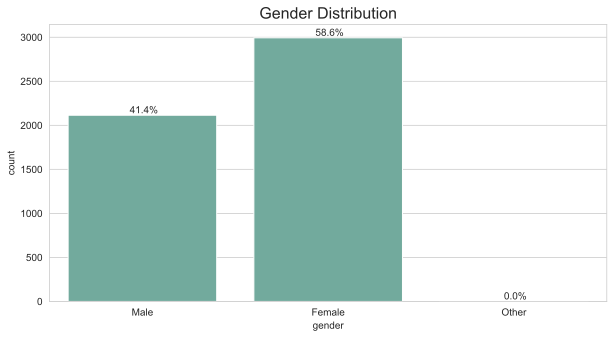

In [11]:
hf.countplot(data=df_eda, column_name="gender", title="Gender Distribution", bar_labels=True);

Let's take a look where that `Other` value comes from.

In [12]:
df_eda.loc[df_eda["gender"] == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


There's only a single row containing `Other` as a gender. In this case, the subject did not suffer a stroke, so there's no data lost on stroke victims. However, in this case, I would have removed the row regardless of the stroke label. Leaving this row in the dataset could in this case cause the model to overfit on this column and treat every case that has `Other` in the gender column as not a stroke risk.

Let's remove the row.

In [13]:
df_eda = df_eda.drop(df_eda.loc[df_eda["gender"] == "Other"].index)



Let's take a look at the age distribution next.

&nbsp;

&nbsp;

#### <a id='toc1_3_1_2_'></a>[Age](#toc0_)

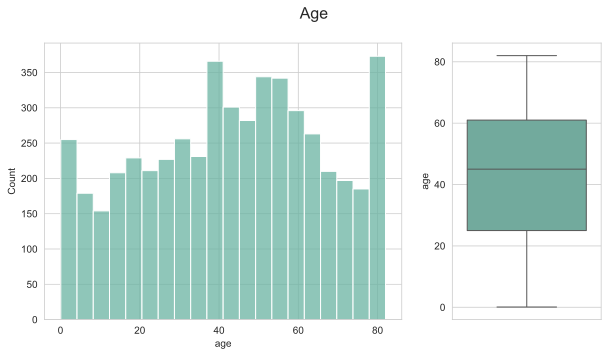

In [14]:
hf.plot_distribution_and_box(data=df_eda, column_name="age", title="Age");

The age data covers a broader range than I expected, the dataset covers newborn babies all the way up to people in their 80's.

We can see a larger representation for the age group 40-65 and a big spike for the 80's age group. 

Let's move on to the `hypertension` column.

&nbsp;

&nbsp;

#### <a id='toc1_3_1_3_'></a>[Hypertension](#toc0_)

Hypertension is more commonly known as high blood pressure. In the dataset this is represented as 0 or 1, there's not a specific blood pressure range specified. Let's transform these values into Yes and No, and take a look at the distribution.

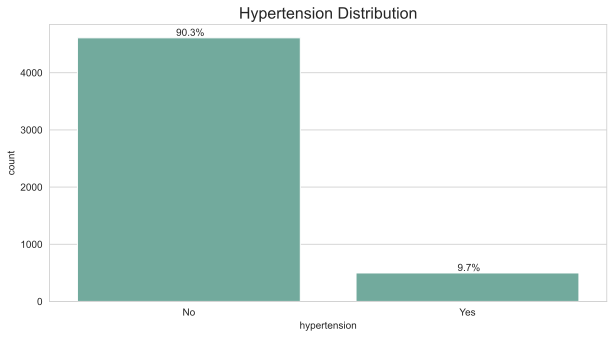

In [15]:
df_eda["hypertension"] = df_eda["hypertension"].astype("category")
df_eda["hypertension"] = df_eda["hypertension"].cat.rename_categories({0: "No", 1: "Yes"})
hf.countplot(data=df_eda, column_name="hypertension", title="Hypertension Distribution", bar_labels=True);

According to [this article by the World Health Organization](https://www.who.int/news/item/19-09-2023-first-who-report-details-devastating-impact-of-hypertension-and-ways-to-stop-it), about 1.3 billion people suffered from hypertension in 2019. According to [this Google search](https://www.google.com/search?client=firefox-b-d&q=world+population+2019), the world population at that time was 7.743 billion people. That would put the worldwide average for people with hypertension at roughly 17%.

In this dataset, the amount of cases with hypertension is quite a bit lower.

Let's keep going and take a look at the `heart_disease`` column.

&nbsp;

&nbsp;

#### <a id='toc1_3_1_4_'></a>[Heart Disease](#toc0_)

Like with the hypertension column, this column is binary a binary category with 0 and 1 as values. These will be transformed to "yes" and "no" before plotting.

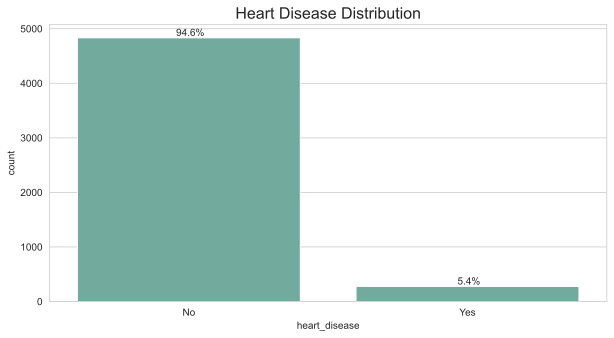

In [16]:
df_eda["heart_disease"] = df_eda["heart_disease"].astype("category")
df_eda["heart_disease"] = df_eda["heart_disease"].cat.rename_categories(
    {0: "No", 1: "Yes"}
)
hf.countplot(
    data=df_eda,
    column_name="heart_disease",
    title="Heart Disease Distribution",
    bar_labels=True,
);

According to [this document by the British Heart Foundation](https://www.bhf.org.uk/-/media/files/for-professionals/research/heart-statistics/bhf-cvd-statistics-global-factsheet.pdf?rev=f323972183254ca0a1043683a9707a01&hash=5AA21565EEE5D85691D37157B31E4AAA), there are about 620 million people suffering from heart disease worldwide in 2023. With a world population of 8.1 billion, results in roughly 8% of people worldwide.

Again, the dataset has a lower amount of cases where there is heart disease present at 5% than the global average at 8%.

Let's take a look at distribution of whether people were ever married.

&nbsp;

&nbsp;

#### <a id='toc1_3_1_5_'></a>[Ever Married](#toc0_)

Just like the previous two columns, the data is a binary category which will first be transformed.

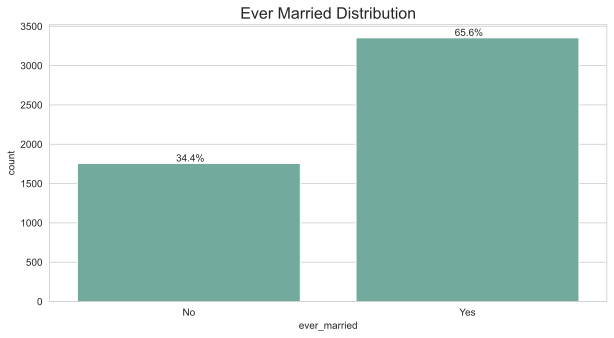

In [17]:
df_eda["ever_married"] = df_eda["ever_married"].astype("category")
df_eda["ever_married"] = df_eda["ever_married"].cat.rename_categories({0: "No", 1: "Yes"})
hf.countplot(
    data=df_eda,
    column_name="ever_married",
    title="Ever Married Distribution",
    bar_labels=True,
);

About 66% of the dataset has ever been married. At the moment, it's unclear to me if this data is valuable in predicting stroke. I think it would be much more valuable to have information on the persons current relationship status and duration. That being said, the importance of this feature will be explored later on in the project.

Let's take a look at what work the person did.

&nbsp;

&nbsp;

#### <a id='toc1_3_1_6_'></a>[Work Type](#toc0_)

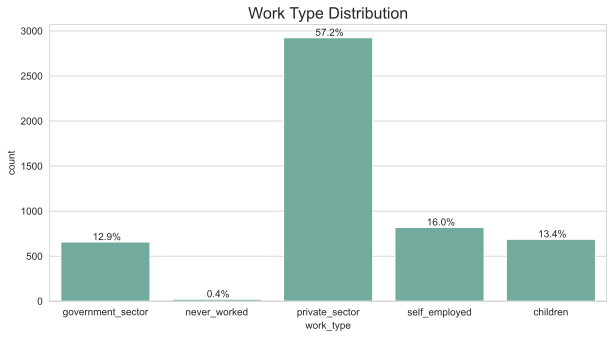

In [18]:
df_eda["work_type"] = df_eda["work_type"].astype("category")
df_eda["work_type"] = df_eda["work_type"].cat.rename_categories(
    {
        "Govt_job": "government_sector",
        "Never_worked": "never_worked",
        "Private": "private_sector",
        "Self-employed": "self_employed",
        "children": "children",
    }
)
hf.countplot(
    data=df_eda, column_name="work_type", title="Work Type Distribution", bar_labels=True
);

The overwhelming majority (57%) of people in the dataset work in the private sector. With self-employed coming in at 2nd place with 16% and government sector following closely with 12.9%

There are two other categories that we'll explore a bit further tho.

First of all, let's check the age range of the children column to look for mislabeled data.

In [19]:
df_eda.loc[df_eda["work_type"] == "children"]["age"].describe()

count    687.000000
mean       6.841339
std        4.533364
min        0.080000
25%        2.000000
50%        6.000000
75%       11.000000
max       16.000000
Name: age, dtype: float64

There are 687 cases labeled as children. The data looks correctly labeled, the minimum age is .8 years and the maximum is 16. This does not exceed the range that was expected.

Now, let's take a look at the cases that were labeled with `never_worked`.

In [20]:
df_eda.loc[df_eda["work_type"] == "never_worked"].describe()

,id,age,avg_glucose_level,bmi,stroke
count,22.000000,22.000000,22.000000,22.000000,22.0
mean,38274.409091,16.181818,96.042727,25.545455,0.0
std,20166.419938,2.342899,28.697132,7.441757,0.0
min,11702.000000,13.000000,59.990000,14.600000,0.0
25%,19830.750000,14.250000,78.457500,20.975000,0.0
50%,36054.500000,16.000000,86.020000,23.150000,0.0
75%,57202.000000,17.000000,112.807500,28.350000,0.0
max,71966.000000,23.000000,161.280000,44.900000,0.0


So, there's 22 people that never worked. Their age ranges from 13 to 23 years old. Ages 0 to 16 were considered children, so those cases could be added to that group. Let's do that first, and take a look at how many cases we're left with after that.

In [21]:
df_eda.loc[
    ((df_eda["work_type"] == "never_worked") & (df_eda["age"] <= 16)), "work_type"
] = "children"
df_eda.loc[df_eda["work_type"] == "never_worked"].describe()

,id,age,avg_glucose_level,bmi,stroke
count,10.000000,10.000000,10.000000,10.000000,10.0
mean,35116.200000,18.100000,93.925000,27.340000,0.0
std,22182.877705,1.852926,21.057689,7.782773,0.0
min,11702.000000,17.000000,61.010000,18.700000,0.0
25%,15121.250000,17.000000,81.887500,21.875000,0.0
50%,30358.500000,17.500000,87.765000,24.600000,0.0
75%,53207.000000,18.000000,109.350000,31.175000,0.0
max,71966.000000,23.000000,125.260000,44.900000,0.0


That leaves 10 rows of data, these people are presumably students or people looking for their first job.

This leaves a few options:

- Keep the rows in the dataset, which could cause noise or even overfitting to an irrelevant feature.
- Relabel these rows as `children` and consider changing this label to `children and young adults`.
- Drop the rows because the impact of these 10 rows on the dataset will likely be minimal.

For this project, I'm choosing to drop these rows. My reasoning for this is that while we're interested in predicting stroke, none of these cases suffered a stroke. Most likely not any important data is lost with this approach.

In [22]:
df_eda = df_eda.drop(df_eda.loc[df_eda["work_type"] == "never_worked"].index)
df_eda["work_type"].value_counts()

work_type
private_sector       2924
self_employed         819
children              699
government_sector     657
never_worked            0
Name: count, dtype: int64

Before moving on, I'll remove the category and check if it's actually removed.

In [23]:
df_eda["work_type"] = df_eda["work_type"].cat.remove_unused_categories()
df_eda["work_type"].cat.categories

Index(['government_sector', 'private_sector', 'self_employed', 'children'], dtype='object')

Let's move on with the residence type.

&nbsp;

&nbsp;

#### <a id='toc1_3_1_7_'></a>[Residence Type](#toc0_)

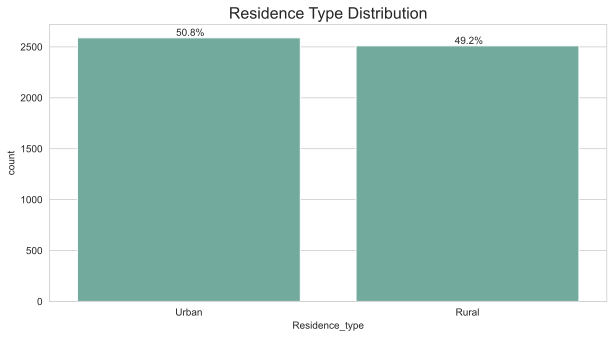

In [24]:
hf.countplot(
    data=df_eda,
    column_name="Residence_type",
    title="Residence Type Distribution",
    bar_labels=True,
);

Residence type is another binary category, which is quite evenly distributed across the dataset. The value of this feature for predicting stroke will be explored later. I don't see how it would hold much value, but I don't want to make assumptions.

Let's continue with the average glucose level.

&nbsp;

&nbsp;

#### <a id='toc1_3_1_8_'></a>[Average Glucose Level](#toc0_)

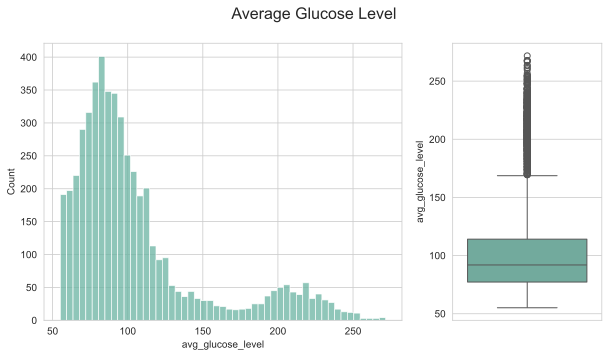

In [25]:
hf.plot_distribution_and_box(
    data=df_eda,
    column_name="avg_glucose_level",
    title="Average Glucose Level",
);

The plots show a left skewed distribution of the average glucose level. There's some outliers starting around values of 170. Since glucose levels is an indicator of diabetes, I'm not going to remove them at this time. In the multivariate analysis the relation between these outliers and the rest of the data will be investigated. These outliers might actually be valuable information for the model.

Let's continue with the `bmi` data.

&nbsp;

&nbsp;

#### <a id='toc1_3_1_9_'></a>[BMI : Body Mass Index](#toc0_)

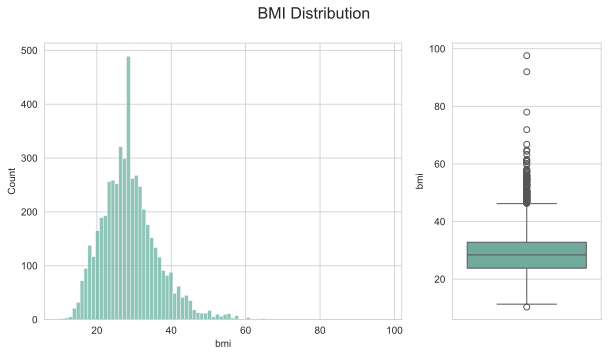

In [26]:
hf.plot_distribution_and_box(data=df_eda, column_name="bmi", title="BMI Distribution");

The bmi covers quite a big range, again with quite some outliers. These will also be explored in the multivariate analysis instead of just capping or removing them.

According to the WHO, these are the ranges of BMI:

<table style='font-size:80%;'>
<tr><td>Underweight:</td><td> below 18.5</td></tr>
<tr><td>Normal weight:</td><td> between 18.5 and 24.9</td></tr>
<tr><td>Pre-obesity:</td><td> between 25 and 29.9</td></tr>
<tr><td>Obesity class 1:</td><td> between 30 and 34.9</td></tr>
<tr><td>Obesity class 2:</td><td> between 35 and 39.9</td></tr>
<tr><td>Obesity class 3:</td><td> Above 40</td></tr>
</table>

Visually, it looks like the majority of the people in the dataset fall into the category of `pre-obesity` and `obesity class 1`.

Let's bin the BMI values into a new column `bmi_class` and take a look whether that's truly the case.

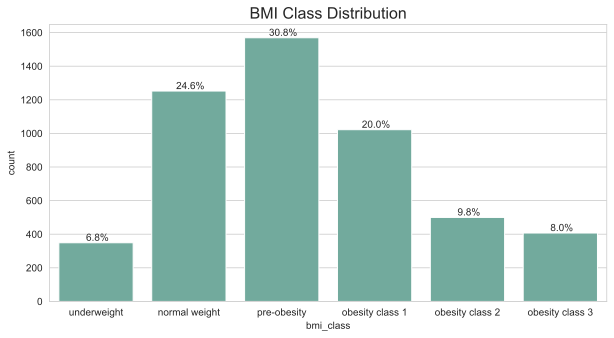

In [27]:
df_eda["bmi_class"] = pd.cut(
    df_eda["bmi"],
    bins=[0, 18.5, 25, 30, 35, 40, 200],
    labels=[
        "underweight",
        "normal weight",
        "pre-obesity",
        "obesity class 1",
        "obesity class 2",
        "obesity class 3",
    ],
)
hf.countplot(
    data=df_eda, column_name="bmi_class", title="BMI Class Distribution", bar_labels=True
);

Looks like it was a good thing to bin these values, because they provide a different conclusion. While the statement that most of the people in the dataset are in the class `pre-obesity`, the second most class is `normal weight`, with `obesity class 1` following at a close 3rd.

Let's continue by taking a look at the smoking status.

&nbsp;

&nbsp;

#### <a id='toc1_3_1_10_'></a>[Smoking Status](#toc0_)

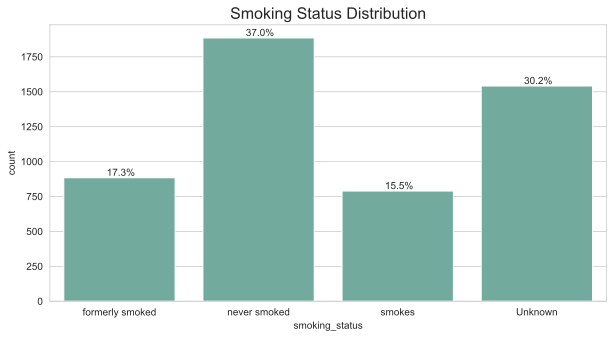

In [28]:
hf.countplot(
    data=df_eda,
    column_name="smoking_status",
    title="Smoking Status Distribution",
    bar_labels=True,
);

Most people in the dataset never smoked. That being said, there is almost a third of the smoker data that is unknown. 

Finally, we arrive at the variable we're trying to predict, stroke.

&nbsp;

&nbsp;

#### <a id='toc1_3_1_11_'></a>[Stroke](#toc0_)

This column is again a binary category. This will again be transformed into yes and no before plotting.

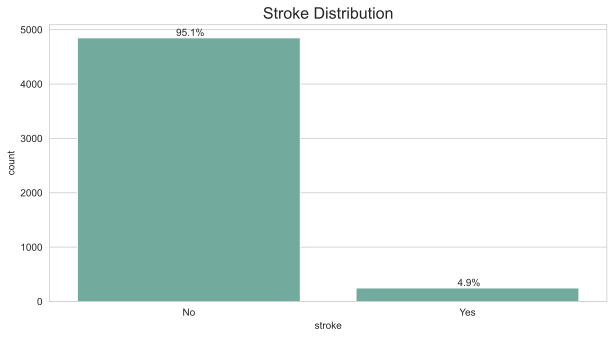

In [29]:
df_eda["stroke"] = df_eda["stroke"].astype("category")
df_eda["stroke"] = df_eda["stroke"].cat.rename_categories({0: "No", 1: "Yes"})
hf.countplot(
    data=df_eda, column_name="stroke", title="Stroke Distribution", bar_labels=True
);

That's quite a big skew in the distribution. This needs to be kept in mind for the machine learning section. Class weights will definitely need to be used to get to a well performing model.

That brings us to the end of the univariate analysis. Let's move on to the multivariate exploration.

&nbsp;

&nbsp;

### <a id='toc1_3_2_'></a>[Multivariate Exploration](#toc0_)

Now that we have a better understanding of every feature, let's take a look at how these features relate to each other.

#### <a id='toc1_3_2_1_'></a>[Gender](#toc0_)

Let's take a look at how the stroke ratio is distributed between genders.

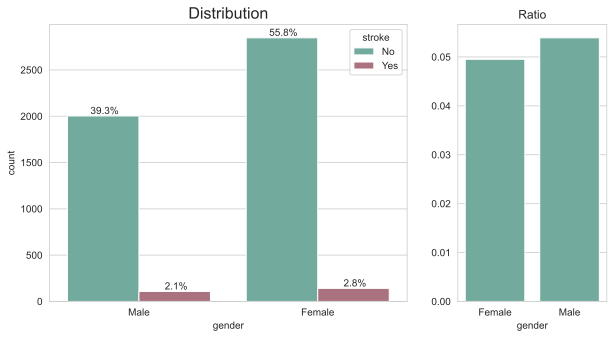

In [30]:
values = df_eda[["stroke", "gender"]].value_counts(normalize=True)
ratio = values["Yes"] / values["No"]
hf.plot_distribution_and_ratio(df_eda, ratio, "gender", "stroke")

The plot above shows slightly more female stroke victims in the dataset than males, but there's more females in the dataset overall. For this reason, I also included the ratio of stroke victims on the right side. We can see that the ratio is a little higher for males, but the difference is not immense.

Let's investigate the relationship between age and stroke.

&nbsp;

&nbsp;

#### <a id='toc1_3_2_2_'></a>[Age](#toc0_)

Below, you'll find the ratio of people suffering from a stroke vs those that didn't. This provides an unbiased picture of how stroke evolves with age, eliminating the different age groups amount of cases in the dataset. Because not every age is represented in the `stroke` and `no-stroke` group, the ages will be binned into groups.

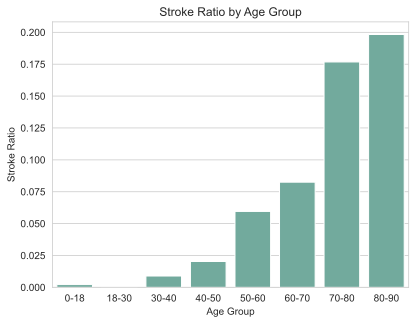

In [31]:
plot_data = df_eda.copy()
plot_data["bin"] = pd.cut(
    df_eda["age"],
    bins=[0, 18, 30, 40, 50, 60, 70, 80, 90],
    labels=["0-18", "18-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"],
)
stroke = (
    plot_data.loc[plot_data["stroke"] == "Yes"]
    .groupby("bin", observed=False)["stroke"]
    .count()
)
total = plot_data.groupby("bin", observed=False)["stroke"].count()
ratio = stroke / total

ax = sns.barplot(x=ratio.index, y=ratio.values, color=hf.COLOR_MAIN)
ax.set(xlabel="Age Group", ylabel="Stroke Ratio", title="Stroke Ratio by Age Group");

The plot above shows that as one gets older, so does the chance of suffering from a stroke. Once someone reaches the age of 70, chances almost double in comparison to someone between 60 and 70.

Let's take a look at the relationship between hypertension and stroke.

&nbsp;

&nbsp;

#### <a id='toc1_3_2_3_'></a>[Hypertension](#toc0_)

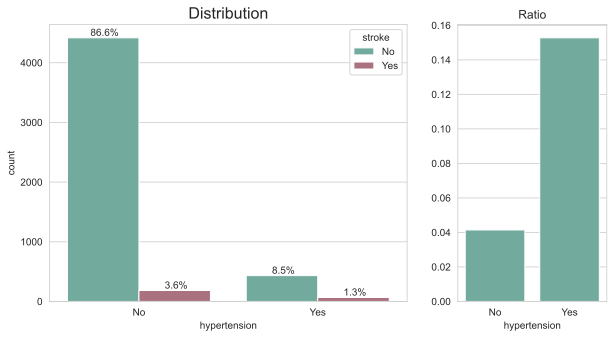

In [32]:
values = df_eda[["stroke", "hypertension"]].value_counts(normalize=True)
ratio = values["Yes"] / values["No"]
hf.plot_distribution_and_ratio(df_eda, ratio, "hypertension", "stroke")

The plot above shows the relationship between hypertension and stroke. Only a small amount of the dataset are people with hypertension (9.8%), but the ratio of stroke in that group is almost 4 times higher than in the no hypertension group.

Let's move on to the relationship between heart_disease and stroke.

&nbsp;

&nbsp;

#### <a id='toc1_3_2_4_'></a>[Heart Disease](#toc0_)

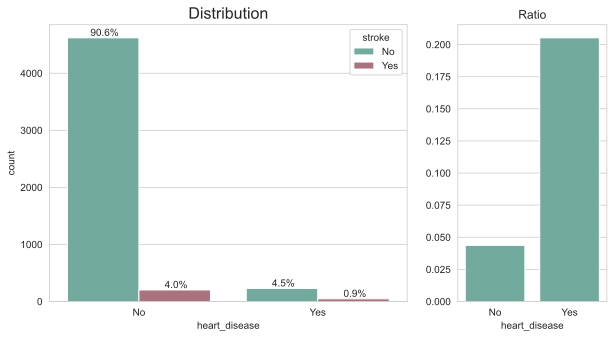

In [33]:
values = df_eda[["stroke", "heart_disease"]].value_counts(normalize=True)
ratio = values["Yes"] / values["No"]
hf.plot_distribution_and_ratio(df_eda, ratio, "heart_disease", "stroke")

Again, there is a much bigger ratio of stroke in those with heart disease compared to those without. More than 4x in this case.

Let's look at the next column.

&nbsp;

&nbsp;

#### <a id='toc1_3_2_5_'></a>[Ever Married](#toc0_)

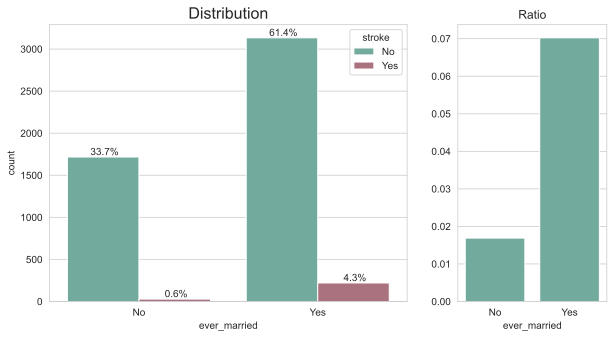

In [34]:
values = df_eda[["stroke", "ever_married"]].value_counts(normalize=True)
ratio = values["Yes"] / values["No"]
hf.plot_distribution_and_ratio(df_eda, ratio, "ever_married", "stroke")

This is unexpected to see. As I stated in the univariate analysis, I'm not sure how the marital status affects someone's chance to suffer from a stroke, but in this dataset the stroke ratio of people that were married is 4 to 5 times larger than those that never married. That being said, I still think it would be much more interesting to have relationship status and relationship duration instead of `ever married`.

Let's see if we can discover why this is the case.

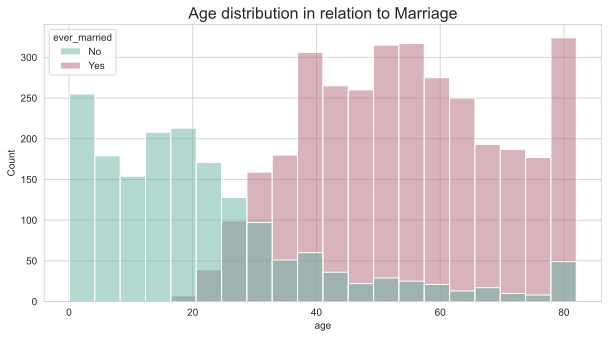

In [35]:
hf.histplot(
    data=df_eda,
    column_name="age",
    hue="ever_married",
    title="Age distribution in relation to Marriage",
);

The plot above explains the higher ratio of stroke in people that have ever been married. A large portion of people that have never been married are simply younger. We already saw that the older one gets, the higher the chance of suffering a stroke. This explains why the ratio of stroke was so much higher for people that have ever been married. This effect is known as confounding. Where in this case, the age both impacts the likelihood of a stroke, and of ever being married. This is important to think about in the data preparation stage since it could impact the performance of machine learning models.

Let's see what effect the work people do has on the risk of stroke.

&nbsp;

&nbsp;

#### <a id='toc1_3_2_6_'></a>[Work Type](#toc0_)

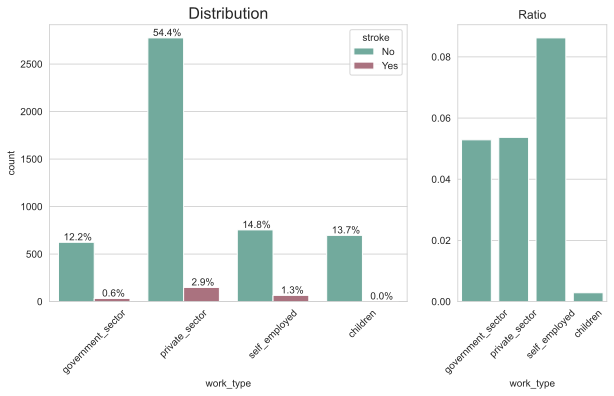

In [36]:
values = df_eda[["stroke", "work_type"]].value_counts(normalize=True)
ratio = values["Yes"] / values["No"]
hf.plot_distribution_and_ratio(df_eda, ratio, "work_type", "stroke", label_rotation=45)

The self-employed sector seems to have a 50% larger ratio of suffering from a stroke.

Let's look at whether this has something to do with the age of people like it was with the `ever_married` column.

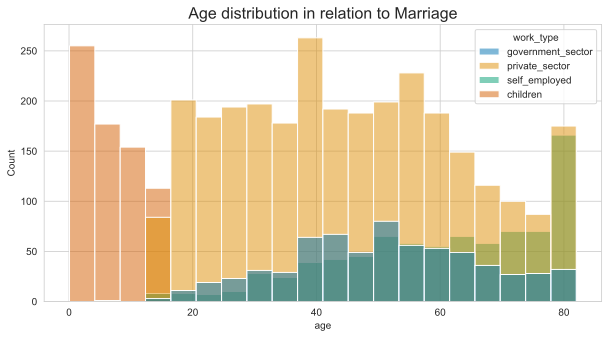

In [37]:
hf.histplot(
    data=df_eda,
    column_name="age",
    hue="work_type",
    title="Age distribution in relation to Marriage",
    palette="colorblind"
);

Again, there's an age difference between the self-employed sector and other sectors. The picture isn't as clear as it was with whether someone was ever married, but there is a difference to be seen.

Let's take a look at the residence type of people.

&nbsp;

&nbsp;

#### <a id='toc1_3_2_7_'></a>[Residence Type](#toc0_)

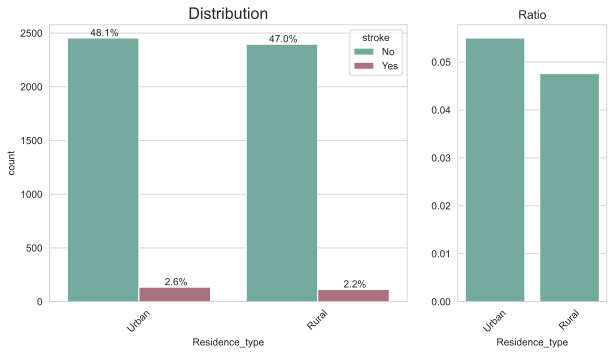

In [38]:
values = df_eda[["stroke", "Residence_type"]].value_counts(normalize=True)
ratio = values["Yes"] / values["No"]
hf.plot_distribution_and_ratio(df_eda, ratio, "Residence_type", "stroke", label_rotation=45)

The difference between urban and rural living with regard to stroke seems to be negligible. 

Let's take a look at the average glucose levels with regard to stroke levels.

&nbsp;

&nbsp;

#### <a id='toc1_3_2_8_'></a>[Average Glucose Level](#toc0_)

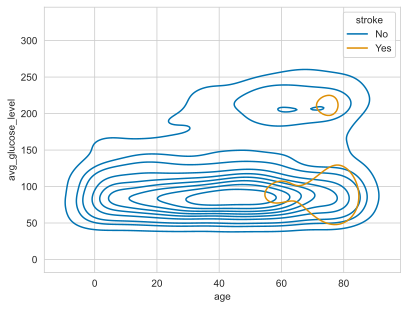

In [39]:
sns.kdeplot(data=df_eda, x="age", y="avg_glucose_level", hue="stroke", palette="colorblind");

In the plot above, the average glucose level doesn't seem to have a large impact on stroke levels. Again, `age` seems to be the biggest determining factor here.

In the univariate section it was also noticed that there are quite some outliers in this column, starting somewhere around 170. From looking at this plot, it doesn't look like it would be an issue to limit these values at a certain maximum. This is something that I'll test in the machine learning section.

&nbsp;

&nbsp;

#### <a id='toc1_3_2_9_'></a>[BMI: Body Mass Index](#toc0_)

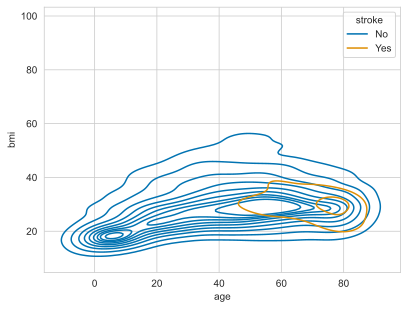

In [40]:
sns.kdeplot(data=df_eda, x="age", y="bmi", hue="stroke", palette="colorblind");

The plot shows that people with a higher BMI have a higher risk of suffering a stroke at a younger age than those with lower BMI values. This also leads me to believe that removing the outliers in the BMI column, or min-max scaling them might hurt the performance of a model. This will be investigated in the machine learning section.

Let's take a look at the effects of smoking.

&nbsp;

&nbsp;

#### <a id='toc1_3_2_10_'></a>[Smoking](#toc0_)

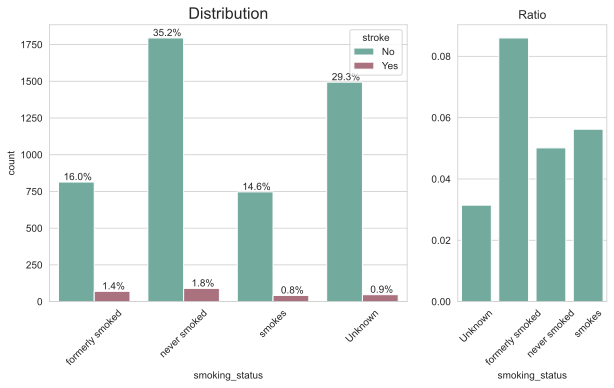

In [41]:
values = df_eda[["stroke", "smoking_status"]].value_counts(normalize=True)
ratio = values["Yes"] / values["No"]
hf.plot_distribution_and_ratio(
    df_eda, ratio, "smoking_status", "stroke", label_rotation=45
);

According to the plot above, those who formerly smoked have the highest risk of suffering from a stroke. This would suggest that it is healthier to keep smoking than to stop, which makes no sense. Let's take another look at the age of the people in these classes to see if that is the reason for the difference.

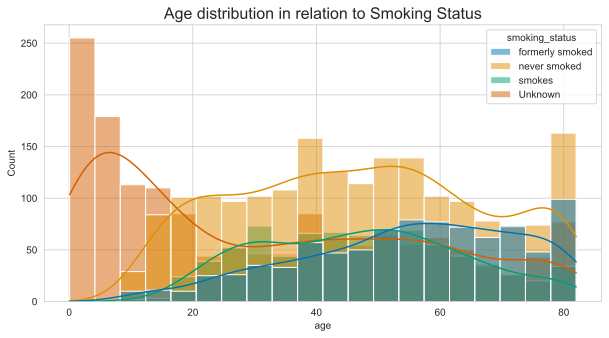

In [42]:
hf.histplot(
    data=df_eda,
    column_name="age",
    hue="smoking_status",
    palette="colorblind",
    title="Age distribution in relation to Smoking Status",
    kde=True,
);

While it is a little hectic, this plot shows why the ratio for formerly smoked was higher than those that smoke. The group that smokes is larger than those that formerly smoked up until the age of about 53, then the group that smokes declines more rapidly than those that formerly smoked. 

Let's move on to the correlations.

&nbsp;

&nbsp;

### <a id='toc1_3_3_'></a>[Correlations](#toc0_)

Let's take a look at the correlation matrix for this data. The matrix that you'll see will differ a bit from the regular square matrix that's usually shown. This is for a specific reason. Since correlations need to be calculated using numerical data, I one-hot-encoded the categorical variables where there were more than two options. I then removed those columns from the correlations because how those one hot encoded variables correlate with each other is irrelevant.

This way, the result is a correlation matrix with more rows than columns, but correlations are present for all categories.

Here are the thresholds with which I'll evaluate the correlations:

&nbsp;

**Thresholds**

<table style='font-size:80%;'>
<tr><td>Very strong negative correlation:</td><td> between -1.00 and -0.81</td></tr>
<tr><td>Strong negative correlation:</td><td> between -0.80 and -0.61</td></tr>
<tr><td>Moderate negative correlation:</td><td> between -0.60 and -0.31</td></tr>
<tr><td>Weak negative correlation:</td><td> between -0.30 and -0.11</td></tr>
<tr><td>No significant correlation:</td><td> between -0.10 and 0.10</td></tr>
<tr><td>Weak positive correlation:</td><td> between 0.11 and 0.30</td></tr>
<tr><td>Moderate positive correlation:</td><td> between 0.31 and 0.60</td></tr>
<tr><td>Strong positive correlation:</td><td> between 0.61 and 0.80</td></tr>
<tr><td>Very strong positive correlation:</td><td> between 0.81 and 1.00</td></tr>
</table>

&nbsp;

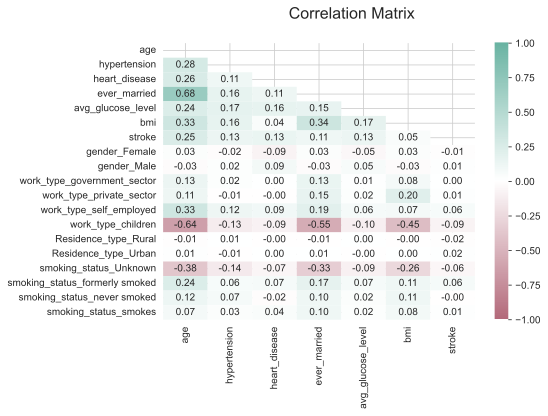

In [43]:
hf.correlation_matrix(hf.get_correlations(df_eda), "Correlation Matrix")

**Observations**

The correlation doesn't bring up a lot of strong or very strong correlations that we haven't seen in the EDA section. Below are some of the observations made from the correlation matrix that are relevant for the analysis.

*Moderate Correlations:*
- BMI: Moderate positive correlation with `age` and `ever married`, meaning that BMI rises as people grow older and get married.
- Work Type self-employed: Moderate positive correlation with `age`, meaning that self-employed people tend to be older
- Smoking status unknown: Moderate negative correlation with `age`, meaning that for younger people, the smoking status is more frequently unknown.

*Weak Correlations:*
- Stroke: Weak positive correlation with `age, hypertension, heart disease, ever married and average glucose level`, meaning that as these values increase, so do stroke levels.



&nbsp;

&nbsp;

---

## <a id='toc1_4_'></a>[Statistical Analysis](#toc0_)

Let's continue with the statistical analysis part of the project.

&nbsp;

### <a id='toc1_4_1_'></a>[Hypothesis 1](#toc0_)

In the EDA it was noticed that people with higher BMI tend to suffer from a stroke at a younger age than those with a lower BMI. Let's use statistical analysis to check whether this difference in age is statistically significant.

**Hypothesis**

- Null hypothesis: *There is no statistically significant age difference between people with high and low BMI that suffered a stroke.*
- Alternative hypothesis: *There is a statistically significant age difference between people with high and low BMI that suffered a stroke.*

&nbsp;

**Target Population**

- Group a: people that suffered a stroke and have a BMI under the median.
- Group b: people that suffered a stroke and have a BMI above the median. 

&nbsp;

**Significance Level**

α : 0.05

In [44]:
bmi_median =df_eda["bmi"].median()

group_a = pd.DataFrame(
    df_eda.loc[(df_eda["stroke"] == "Yes") & (df_eda["bmi"] < bmi_median), "age"]
)
group_b = pd.DataFrame(
    df_eda.loc[(df_eda["stroke"] == "Yes") & (df_eda["bmi"] >= bmi_median), "age"]
)

len(group_a), len(group_b)

(88, 161)

The sample size is quite small, let's take a look at how it is distributed before deciding which test to use.

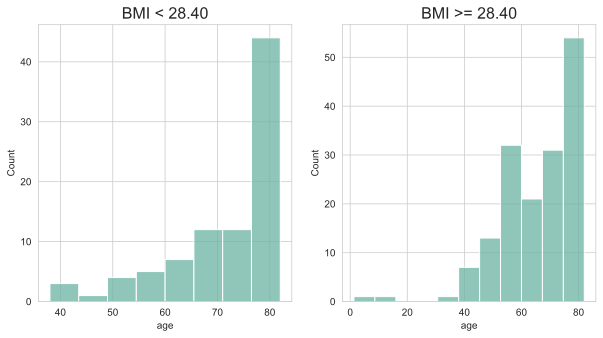

In [45]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
hf.histplot(data=group_a, column_name="age", ax=ax[0], title=f"BMI < {bmi_median:.2f}")
hf.histplot(data=group_b, column_name="age", ax=ax[1], title=f"BMI >= {bmi_median:.2f}");

We can see from the plots that the data is not normally distributed. Let's confirm this with a shapiro-wilks test.

In [46]:
print(
    f"Group a, data is normally distributed: {stats.shapiro(group_a).pvalue > 0.05} \nGroup b,"
    f" data is normally distributed: {stats.shapiro(group_b).pvalue > 0.05}"
)

Group a, data is normally distributed: False 
Group b, data is normally distributed: False


The test confirms what was seen in the plots. The data of neither population is normally distributed. 

&nbsp;

**Test Choice**

The data consists of two independent populations of numerical data. Both populations are not normally distributed and the sample size is relatively small. This leads me to use a Mann-Whitney U test to test the hypothesis.

&nbsp;

**Test execution**

In [47]:
print(f"Results from the Mann-Whitney U test: \nThe null hypothesis can be rejected: {(stats.mannwhitneyu(group_a, group_b).pvalue[0] < 0.05)}")

Results from the Mann-Whitney U test: 
The null hypothesis can be rejected: True


&nbsp;

**Observations**

The Mann-Whitney U test confirms the alternative hypothesis. There is a statistically significant difference in the age of people that suffered from a stroke when comparing people with high and low BMI.

Let's move on to the machine learning section.

&nbsp;

&nbsp;

---

## <a id='toc1_5_'></a>[Machine Learning](#toc0_)

### <a id='toc1_5_1_'></a>[Data Loading](#toc0_)

Let's load the data that we'll be using as input for our model.

In [48]:
df_ml = df = pd.read_csv("src/data/healthcare-dataset-stroke-data.csv")

### <a id='toc1_5_2_'></a>[Data Preparation](#toc0_)

Let's prepare the data for use in the model. The first step is a prep_data function call that is included in the helper functions. This function does the following:

- Removes id column
- Removes the row with `Other` as gender
- Drop the rows with age older than 16 and that have `never worked` as work type

This approach removes the issues with the data discovered in the EDA without dropping any features. A model will be trained on this data to get a baseline performance that can then be used for feature selection and engineering.


In [49]:
df_prepped = hf.prep_data(df_ml)

&nbsp;

#### <a id='toc1_5_2_1_'></a>[Train - test split](#toc0_)

Before applying any transformations to the data, the data will be split into a training and testing set. Doing this before any transformations will ensure that there is no data leakage.

In [50]:
X = df_prepped.drop(columns=["stroke"])
y = df_prepped["stroke"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

logger.info(f"X_train shape: {X_train.shape}")
logger.info(f"X_test shape: {X_test.shape}")

2024-01-08 15:25:10,250 - root - INFO - X_train shape: (4079, 10)
2024-01-08 15:25:10,251 - root - INFO - X_test shape: (1020, 10)


Before training and testing models, there's one more step to take: preprocessing of the data.

&nbsp;

#### <a id='toc1_5_2_2_'></a>[Data Preprocessing](#toc0_)

Usually, I do data preprocessing step by step and show how the data changed between steps. This is also what I did here first. But I decided on another approach afterward. I'm putting all data preprocessing into a scikit learn pipeline. This pipeline creation is contained in the `helper_functions.py` file if you'd like to take a look at it. 

Here's a description of what steps are taken in the pipeline:

- Binary encoding of the binary categories (`gender, ever_married and residence_type`). These categories only have two options, and are thus encoded to 0 and 1. Missing values are also imputed here (using the most frequent strategy). This is mostly done as a guard against missing value issues when the model is deployed since the dataset itself has no missing values in this column.

- One hot encoding of categories with more than 2 options (`work_type, smoking_status`). There is also an imputation step (most_frequent as strategy) included here to guard against missing value inputs when the model is deployed.

- Handling numerical values (`age, bmi, avg_glucose_level`)
    - Imputing missing values using KNN imputer
    - Scaling the data to a mean of 0 and standard deviation of 1
    - Normalizing the data to a range of 1


All this is put into the pipeline object together with the provided model to train and test.

&nbsp;

### <a id='toc1_5_3_'></a>[Model Training and Evaluation](#toc0_)

This section contains the model training and evaluation section of the project.

In [51]:
binary_columns = ["gender", "ever_married", "Residence_type"]
numerical_columns = ["age", "bmi", "avg_glucose_level"]
categorical_columns = ["work_type", "smoking_status"]

#### <a id='toc1_5_3_1_'></a>[Logistic Regression](#toc0_)

Let's start of by creating a regression model and taking a look at baseline performance.

In [52]:
model = LogisticRegression(random_state=42, class_weight="balanced", max_iter=10000, verbose=0)
lr_pipe = hf.get_pipeline(
    model
)
lr_pipe.fit(X_train, y_train)
hf.test_model(
    model=lr_pipe,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:10,606 - root - INFO - Training scores:

2024-01-08 15:25:10,625 - root - INFO -     - Accuracy: 0.681
2024-01-08 15:25:10,632 - root - INFO -     - Precision: 0.123
2024-01-08 15:25:10,636 - root - INFO -     - Recall: 0.905

2024-01-08 15:25:10,645 - root - INFO - Test scores:

2024-01-08 15:25:10,646 - root - INFO -     - Accuracy: 0.685
2024-01-08 15:25:10,647 - root - INFO -     - Precision: 0.123
2024-01-08 15:25:10,648 - root - INFO -     - Recall: 0.880


Looking at the training and testing metrics, the model is not overfitting. In this project, I'm interested to first get `recall` as high as possible, followed by `precision`. The reasoning for this is that the cost of being wrong is much higher when predicting no stroke than when predicting stroke. In other words, telling someone they are at risk of suffering a stroke and being wrong, is less important than telling someone they are not at risk and them suffering a stroke.

Before moving on to hyperparameter tuning, I'd like to explore how altering the outliers affects the performance of the model.

In [53]:
bmi_range = hf.calculate_outlier_range(X_train["bmi"])

X_train_bmi = X_train.copy()
X_test_bmi = X_test.copy()

X_train_bmi["bmi"] = X_train_bmi["bmi"].clip(lower=bmi_range[0], upper=bmi_range[1])
X_test_bmi["bmi"] = X_test_bmi["bmi"].clip(lower=bmi_range[0], upper=bmi_range[1])

lr_pipe.fit(X_train_bmi, y_train)
hf.test_model(
    model=lr_pipe,
    x_train=X_train_bmi,
    y_train=y_train,
    x_test=X_test_bmi,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:10,886 - root - INFO - Training scores:

2024-01-08 15:25:10,893 - root - INFO -     - Accuracy: 0.682
2024-01-08 15:25:10,900 - root - INFO -     - Precision: 0.123
2024-01-08 15:25:10,907 - root - INFO -     - Recall: 0.905

2024-01-08 15:25:10,915 - root - INFO - Test scores:

2024-01-08 15:25:10,916 - root - INFO -     - Accuracy: 0.686
2024-01-08 15:25:10,917 - root - INFO -     - Precision: 0.123
2024-01-08 15:25:10,918 - root - INFO -     - Recall: 0.880


Removing outliers from the bmi column did not alter the performance at all. Let's see if removing the glucose level outliers has any effect on performance.

In [54]:
avg_glucose_level_range = hf.calculate_outlier_range(X_train["avg_glucose_level"])

X_train_gl = X_train.copy()
X_test_gl = X_test.copy()
X_train_gl["avg_glucose_level"] = X_train_gl["avg_glucose_level"].clip(
    lower=avg_glucose_level_range[0], upper=avg_glucose_level_range[1]
)
X_test_gl["avg_glucose_level"] = X_test_gl["avg_glucose_level"].clip(
    lower=avg_glucose_level_range[0], upper=avg_glucose_level_range[1]
)

lr_pipe.fit(X_train_gl, y_train)
hf.test_model(
    model=lr_pipe,
    x_train=X_train_gl,
    y_train=y_train,
    x_test=X_test_gl,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:11,159 - root - INFO - Training scores:

2024-01-08 15:25:11,161 - root - INFO -     - Accuracy: 0.686
2024-01-08 15:25:11,165 - root - INFO -     - Precision: 0.124
2024-01-08 15:25:11,187 - root - INFO -     - Recall: 0.899

2024-01-08 15:25:11,216 - root - INFO - Test scores:

2024-01-08 15:25:11,221 - root - INFO -     - Accuracy: 0.687
2024-01-08 15:25:11,223 - root - INFO -     - Precision: 0.123
2024-01-08 15:25:11,224 - root - INFO -     - Recall: 0.880


Again, no improvement. Let's see what happens when we remove the outliers from both columns.

In [55]:
X_train_both = X_train.copy()
X_test_both = X_test.copy()

X_train_both["bmi"] = X_train_bmi["bmi"]
X_train_both["avg_glucose_level"] = X_train_gl["avg_glucose_level"]

X_test_both["bmi"] = X_test_bmi["bmi"]
X_test_both["avg_glucose_level"] = X_test_gl["avg_glucose_level"]

lr_pipe.fit(X_train_both, y_train)
hf.test_model(
    model=lr_pipe,
    x_train=X_train_both,
    y_train=y_train,
    x_test=X_test_both,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:11,626 - root - INFO - Training scores:

2024-01-08 15:25:11,630 - root - INFO -     - Accuracy: 0.687
2024-01-08 15:25:11,636 - root - INFO -     - Precision: 0.125
2024-01-08 15:25:11,641 - root - INFO -     - Recall: 0.899

2024-01-08 15:25:11,648 - root - INFO - Test scores:

2024-01-08 15:25:11,649 - root - INFO -     - Accuracy: 0.688
2024-01-08 15:25:11,650 - root - INFO -     - Precision: 0.124
2024-01-08 15:25:11,651 - root - INFO -     - Recall: 0.880


Removing the outliers from both columns improved the precision by .1%. It's not much, but it is an improvement. I'll thus be using this for the other models as well.

In [56]:
X_train = X_train_both.copy()
X_test = X_test_both.copy()

Let's see if we can get some extra performance by hyperparameter optimization.

&nbsp;

##### <a id='toc1_5_3_1_1_'></a>[Hyperparameter Optimization](#toc0_)

In [57]:
recalculate = False
if os.path.exists("models/logistic_regression_search.pkl") and not recalculate:
    logger.info("Loading model from file.")
    lr_search = joblib.load("models/logistic_regression_search.pkl")

else:
    parameter_grid = [
        {
            "model__solver": ["liblinear", "saga"],
            "model__penalty": ["l1", "l2"],
            "model__C": [0.01, 0.1, 1, 10, 100],
        },
        {
            "model__solver": ["newton-cg", "lbfgs", "sag"],
            "model__penalty": ["l2"],
            "model__C": [0.01, 0.1, 1, 10, 100],
        },
    ]

    lr_search = GridSearchCV(
        estimator=lr_pipe,
        param_grid=parameter_grid,
        scoring="recall",
        n_jobs=-1,
        cv=5,
        verbose=1,
    )

    lr_search.fit(X_train, y_train)
    logger.info("Saving model to file --> models/logistic_regression_search.pkl")
    joblib.dump(lr_search, "models/logistic_regression_search.pkl")

2024-01-08 15:25:11,669 - root - INFO - Loading model from file.



Let's see how the model is performing.

In [58]:
lr_model = lr_search.best_estimator_
hf.test_model(model=lr_model, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, logger=logger)

2024-01-08 15:25:11,761 - root - INFO - Training scores:

2024-01-08 15:25:11,765 - root - INFO -     - Accuracy: 0.616
2024-01-08 15:25:11,771 - root - INFO -     - Precision: 0.105
2024-01-08 15:25:11,776 - root - INFO -     - Recall: 0.910

2024-01-08 15:25:11,784 - root - INFO - Test scores:

2024-01-08 15:25:11,786 - root - INFO -     - Accuracy: 0.626
2024-01-08 15:25:11,787 - root - INFO -     - Precision: 0.107
2024-01-08 15:25:11,789 - root - INFO -     - Recall: 0.900


The optimization increased the recall by about 2%, but did come at the cost of 1.7% precision.

Let's take a look at the ROC curve and confusion matrix

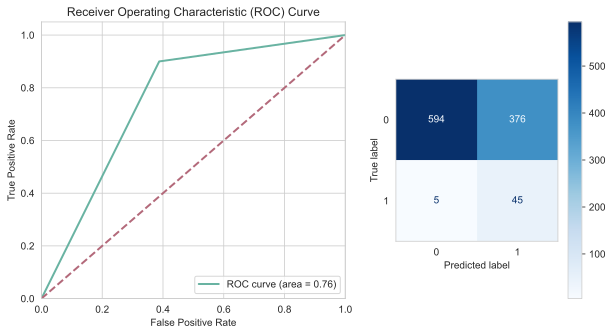

In [59]:
hf.plot_roc_and_confusion_matrix(lr_model, X_test, y_test)

Finally, let's take a look at the SHAP values.

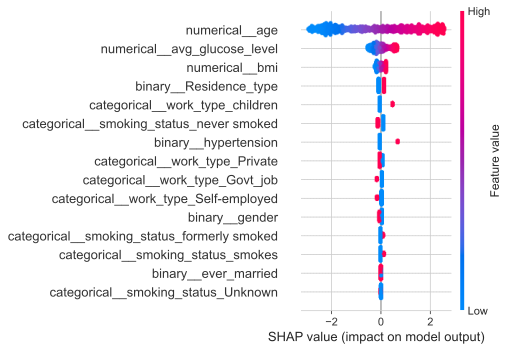

In [60]:
hf.plot_shap_values(
    lr_pipe.named_steps["model"],
    lr_pipe.named_steps["preprocessor"].transform(X_test),
    explainer="linear",
    feature_names=lr_pipe.named_steps["preprocessor"].get_feature_names_out(),
)

&nbsp;

&nbsp;

#### <a id='toc1_5_3_2_'></a>[Random Forest](#toc0_)

Let's see how a random forest performs.

In [61]:
rf_pipe = hf.get_pipeline(
    model=RandomForestClassifier(random_state=42, class_weight="balanced")
)
rf_pipe.fit(X_train, y_train)
hf.test_model(
    model=rf_pipe,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:13,478 - root - INFO - Training scores:

2024-01-08 15:25:13,493 - root - INFO -     - Accuracy: 1.000
2024-01-08 15:25:13,499 - root - INFO -     - Precision: 1.000
2024-01-08 15:25:13,503 - root - INFO -     - Recall: 1.000

2024-01-08 15:25:13,510 - root - INFO - Test scores:

2024-01-08 15:25:13,517 - root - INFO -     - Accuracy: 0.948
2024-01-08 15:25:13,518 - root - INFO -     - Precision: 0.000
2024-01-08 15:25:13,519 - root - INFO -     - Recall: 0.000


The model is overfitting to the training data, let's try to solve this with some hyperparameter optimization.

In [62]:
if os.path.exists("models/random_forest_search.pkl") and not recalculate:
        logger.info("Loading model from file.")
        rf_search = joblib.load("models/random_forest_search.pkl")
else:
    rf_parameter_grid = {
        "model__n_estimators": [10, 30, 50, 100, 200,],
        "model__max_features": ["sqrt", "log2"],
        "model__max_depth": [None, 1, 5, 10, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4],
        "model__bootstrap": [True],
    }

    rf_search = GridSearchCV(
        estimator=rf_pipe,
        param_grid=rf_parameter_grid,
        scoring="recall",
        n_jobs=-1,
        cv=5,
        verbose=1,
        error_score='raise',
    )

    rf_search.fit(X_train, y_train)
    logger.info("Saving model to file --> models/random_forest_search.pkl")
    joblib.dump(rf_search, "models/random_forest_search.pkl")

hf.test_model(
    model=rf_search.best_estimator_,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:13,533 - root - INFO - Loading model from file.
2024-01-08 15:25:13,689 - root - INFO - Training scores:

2024-01-08 15:25:13,694 - root - INFO -     - Accuracy: 0.622
2024-01-08 15:25:13,699 - root - INFO -     - Precision: 0.105
2024-01-08 15:25:13,705 - root - INFO -     - Recall: 0.894

2024-01-08 15:25:13,710 - root - INFO - Test scores:

2024-01-08 15:25:13,711 - root - INFO -     - Accuracy: 0.618
2024-01-08 15:25:13,711 - root - INFO -     - Precision: 0.101
2024-01-08 15:25:13,712 - root - INFO -     - Recall: 0.860


The model isn't overfitting anymore, but the performance is worse than the linear model on every metric.

Let's look at the AUC.

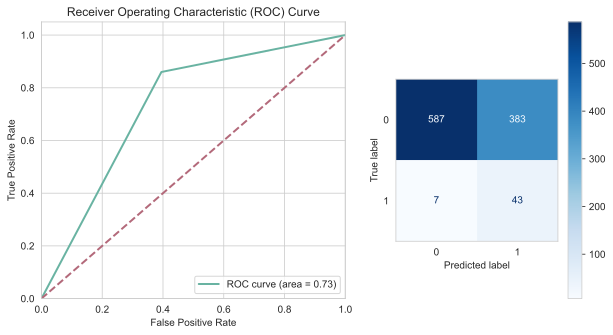

In [63]:
hf.plot_roc_and_confusion_matrix(rf_search.best_estimator_, X_test, y_test)



Let's explore how a support vector machine performs.

&nbsp;

#### <a id='toc1_5_3_3_'></a>[Support Vector Machine](#toc0_)

In [64]:
svm_pipe = hf.get_pipeline(
    model=SVC(random_state=42, class_weight="balanced")
)
svm_pipe.fit(X_train, y_train)
hf.test_model(
    model=svm_pipe,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:15,178 - root - INFO - Training scores:

2024-01-08 15:25:15,181 - root - INFO -     - Accuracy: 0.714
2024-01-08 15:25:15,191 - root - INFO -     - Precision: 0.142
2024-01-08 15:25:15,199 - root - INFO -     - Recall: 0.960

2024-01-08 15:25:15,203 - root - INFO - Test scores:

2024-01-08 15:25:15,207 - root - INFO -     - Accuracy: 0.694
2024-01-08 15:25:15,209 - root - INFO -     - Precision: 0.108
2024-01-08 15:25:15,209 - root - INFO -     - Recall: 0.720


The base model is performing worse than the linear model, let's see if we can improve it with hyperparameter optimization.

In [65]:
if os.path.exists("models/support_vector_machine_search.pkl") and not recalculate:
    
    logger.info("Loading model from file.")
    svm_search = joblib.load("models/support_vector_machine_search.pkl")

else:
    svm_parameter_grid = {
        "model__C": [0.1, 1, 10],
        "model__kernel": [
            "linear",
            "rbf",
            "poly",
            "sigmoid",
        ],
        "model__gamma": [
            "scale",
            "auto",
        ],
    }


    svm_search = GridSearchCV(
        estimator=svm_pipe,
        param_grid=svm_parameter_grid,
        scoring="recall",
        n_jobs=-1,
        cv=5,
        verbose=1,
        error_score="raise",
    )

    svm_search.fit(X_train, y_train)
    logger.info("Saving model to file --> models/support_vector_machine_search.pkl")
    joblib.dump(svm_search, "models/support_vector_machine_search.pkl")



hf.test_model(
    model=svm_search.best_estimator_,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    logger=logger,

)

2024-01-08 15:25:15,219 - root - INFO - Loading model from file.
2024-01-08 15:25:15,833 - root - INFO - Training scores:

2024-01-08 15:25:15,837 - root - INFO -     - Accuracy: 0.581
2024-01-08 15:25:15,842 - root - INFO -     - Precision: 0.098
2024-01-08 15:25:15,849 - root - INFO -     - Recall: 0.930

2024-01-08 15:25:15,853 - root - INFO - Test scores:

2024-01-08 15:25:15,854 - root - INFO -     - Accuracy: 0.584
2024-01-08 15:25:15,855 - root - INFO -     - Precision: 0.097
2024-01-08 15:25:15,855 - root - INFO -     - Recall: 0.900


This performance is slightly behind the linear model.

The last model that I'll test from the scikit learn library will be a KNN model.

&nbsp;

&nbsp;

#### <a id='toc1_5_3_4_'></a>[K-Nearest Neighbors](#toc0_)

Again, let's start off with the default hyperparameters.

In [66]:
knn_pipe = hf.get_pipeline(
    model=KNeighborsClassifier()
)
knn_pipe.fit(X_train, y_train)
hf.test_model(
    model=knn_pipe,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:16,231 - root - INFO - Training scores:

2024-01-08 15:25:16,233 - root - INFO -     - Accuracy: 0.952
2024-01-08 15:25:16,239 - root - INFO -     - Precision: 0.632
2024-01-08 15:25:16,253 - root - INFO -     - Recall: 0.060

2024-01-08 15:25:16,281 - root - INFO - Test scores:

2024-01-08 15:25:16,288 - root - INFO -     - Accuracy: 0.951
2024-01-08 15:25:16,289 - root - INFO -     - Precision: 0.000
2024-01-08 15:25:16,290 - root - INFO -     - Recall: 0.000


This is a great example of why accuracy can be a very deceiving metric. In this case, we have 95% accuracy, and you might think wow, that's great! But look at the recall and precision. Literally 0 score on those. Let's take a look at the roc curve and confusion matrix to see what's happening.

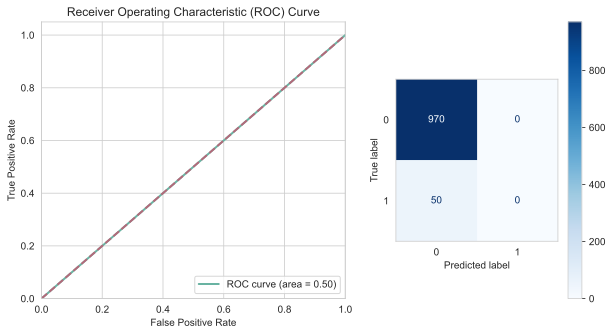

In [67]:
hf.plot_roc_and_confusion_matrix(knn_pipe, X_test, y_test)

Looking at the confusion matrix, the picture becomes clear. The model is predicting no stroke for every sample. Because the dataset is extremely skewed, the accuracy is also very high.

Let's see if this can be improved with some hyperparameter tuning.

In [68]:
if os.path.exists("models/k_nearest_neighbors_search.pkl") and not recalculate:
        logger.info("Loading model from file.")
        knn_search = joblib.load("models/k_nearest_neighbors_search.pkl")
else:
    knn_parameter_grid = {
        "model__n_neighbors": [2,5,10,15],
        "model__algorithm": ["auto","ball_tree","kd_tree","brute"],
        "model__leaf_size": [10,20,30,40,50],
        "model__p": [1, 2]
    }

    knn_search = GridSearchCV(
        estimator=knn_pipe,
        param_grid=knn_parameter_grid,
        scoring="recall",
        n_jobs=-1,
        cv=5,
        verbose=1,
        error_score="raise",
    )

    knn_search.fit(X_train, y_train)
    logger.info("Saving model to file --> models/k_nearest_neighbors_search.pkl")
    joblib.dump(knn_search, "models/k_nearest_neighbors_search.pkl")


hf.test_model(
    model=knn_search.best_estimator_,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:16,889 - root - INFO - Loading model from file.
2024-01-08 15:25:17,251 - root - INFO - Training scores:

2024-01-08 15:25:17,257 - root - INFO -     - Accuracy: 0.954
2024-01-08 15:25:17,266 - root - INFO -     - Precision: 0.704
2024-01-08 15:25:17,271 - root - INFO -     - Recall: 0.095

2024-01-08 15:25:17,279 - root - INFO - Test scores:

2024-01-08 15:25:17,280 - root - INFO -     - Accuracy: 0.949
2024-01-08 15:25:17,281 - root - INFO -     - Precision: 0.250
2024-01-08 15:25:17,282 - root - INFO -     - Recall: 0.020


That improved the results somewhat, the precision is the highest that was achieved up until now. To be fair to the other models, the optimization was done for recall. Let's see if we can improve the performance by ensembling different models.

&nbsp;

&nbsp;

#### <a id='toc1_5_3_5_'></a>[Model Ensembling](#toc0_)

Because the linear classifier had the best recall, and the knn model had the best precision, let's investigate if combining them leads to improved results. For this ensemble, I'm combining the linear model which had the highest recall, with the knn model, which had the highest precision.

In [69]:
ensemble = VotingClassifier(estimators=[("lr", lr_search.best_estimator_), ("knn", knn_search.best_estimator_)], voting="soft")
ensemble.fit(X_train, y_train)
hf.test_model(
    model=ensemble,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:17,664 - root - INFO - Training scores:

2024-01-08 15:25:17,665 - root - INFO -     - Accuracy: 0.954
2024-01-08 15:25:17,673 - root - INFO -     - Precision: 0.516
2024-01-08 15:25:17,693 - root - INFO -     - Recall: 0.905

2024-01-08 15:25:17,703 - root - INFO - Test scores:

2024-01-08 15:25:17,725 - root - INFO -     - Accuracy: 0.879
2024-01-08 15:25:17,731 - root - INFO -     - Precision: 0.090
2024-01-08 15:25:17,734 - root - INFO -     - Recall: 0.160


The model is performing really well on the training set, but it does not generalize well as we can see from the test set.

One final approach that I want to test is an XGBoost model.

&nbsp;

&nbsp;

#### <a id='toc1_5_3_6_'></a>[XGBoost](#toc0_)

XGBoost models are known to perform well, even against more complex models. Let's take a look at how it performs on this dataset.

In [70]:
xgb_pipe = hf.get_pipeline(
    model=XGBClassifier(random_state=42)
)
xgb_pipe.fit(X_train, y_train)
hf.test_model(
    model=xgb_pipe,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:18,176 - root - INFO - Training scores:

2024-01-08 15:25:18,177 - root - INFO -     - Accuracy: 0.991
2024-01-08 15:25:18,183 - root - INFO -     - Precision: 1.000
2024-01-08 15:25:18,189 - root - INFO -     - Recall: 0.824

2024-01-08 15:25:18,198 - root - INFO - Test scores:

2024-01-08 15:25:18,199 - root - INFO -     - Accuracy: 0.940
2024-01-08 15:25:18,200 - root - INFO -     - Precision: 0.000
2024-01-08 15:25:18,201 - root - INFO -     - Recall: 0.000


That's not looking too promising. Let's see if things can be improved with some hyperparameter tuning.

In [71]:
if os.path.exists("models/xgboost_search.pkl") and not recalculate:
    logger.info("Loading model from file.")
    xgb_search = joblib.load("models/xgboost_search.pkl")

else:
    xgb_parameter_grid = {
        "model__max_depth": [3, 6],
        "model__learning_rate": [0.1, 0.2,],
        "model__n_estimators": [ 200, 300,],
        "model__gamma": [ 0.1, 0.2],
        }

    xgb_search = GridSearchCV(
        estimator=xgb_pipe,
        param_grid=xgb_parameter_grid,
        scoring="recall",
        n_jobs=-1,
        cv=5,
        verbose=1,
        error_score="raise",
    )

    xgb_search.fit(X_train, y_train)
    logger.info("Saving model to file --> models/xgboost_search.pkl")
    joblib.dump(xgb_search, "models/xgboost_search.pkl")


hf.test_model(
    model=xgb_search.best_estimator_,
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:18,211 - root - INFO - Loading model from file.
2024-01-08 15:25:18,377 - root - INFO - Training scores:

2024-01-08 15:25:18,380 - root - INFO -     - Accuracy: 0.963
2024-01-08 15:25:18,391 - root - INFO -     - Precision: 0.873
2024-01-08 15:25:18,397 - root - INFO -     - Recall: 0.276

2024-01-08 15:25:18,405 - root - INFO - Test scores:

2024-01-08 15:25:18,406 - root - INFO -     - Accuracy: 0.947
2024-01-08 15:25:18,407 - root - INFO -     - Precision: 0.167
2024-01-08 15:25:18,408 - root - INFO -     - Recall: 0.020


Yikes, that did not improve much. Let's move on to optimization.

&nbsp;

&nbsp;

---

### <a id='toc1_5_4_'></a>[Optimization](#toc0_)

Now that the best model has been identified, let's see if it's possible to do some optimization. The first thing that I'll explore is whether we can drop certain features without losing performance.

Let's use recursive feature elimination to see which features are most important to this model.

In [72]:
from sklearn.feature_selection import RFE

best_model = LogisticRegression(**lr_search.best_estimator_["model"].get_params())
preprocessor = lr_pipe.named_steps["preprocessor"]

rfe = RFE(estimator=best_model ,n_features_to_select=1)
rfe.fit(preprocessor.transform(X_train), y_train)

ranking = {}
for i, feature in enumerate(rfe.support_):
    ranking[preprocessor.get_feature_names_out()[i]] = rfe.ranking_[i]

for feature, rank in sorted(ranking.items(), key=lambda x: x[1]):
    logger.info(f"{feature} has a rank of {rank}")

2024-01-08 15:25:18,629 - root - INFO - numerical__age has a rank of 1
2024-01-08 15:25:18,630 - root - INFO - numerical__avg_glucose_level has a rank of 2
2024-01-08 15:25:18,631 - root - INFO - numerical__bmi has a rank of 3
2024-01-08 15:25:18,631 - root - INFO - categorical__smoking_status_smokes has a rank of 4
2024-01-08 15:25:18,633 - root - INFO - categorical__smoking_status_never smoked has a rank of 5
2024-01-08 15:25:18,635 - root - INFO - categorical__smoking_status_formerly smoked has a rank of 6
2024-01-08 15:25:18,635 - root - INFO - categorical__smoking_status_Unknown has a rank of 7
2024-01-08 15:25:18,636 - root - INFO - categorical__work_type_children has a rank of 8
2024-01-08 15:25:18,637 - root - INFO - categorical__work_type_Self-employed has a rank of 9
2024-01-08 15:25:18,638 - root - INFO - categorical__work_type_Private has a rank of 10
2024-01-08 15:25:18,639 - root - INFO - categorical__work_type_Govt_job has a rank of 11
2024-01-08 15:25:18,640 - root - IN

We now have a clear ranking of each feature. Let's see how many features can be dropped without losing too much performance.

Let's start off with only `age, avg_glucose_level and bmi.`

In [73]:
cols_to_drop = [
    "work_type",
    "smoking_status",
    "gender",
    "ever_married",
    "Residence_type",
    "heart_disease",
    "hypertension"
]
X_train_reduced = X_train.drop(
    columns=cols_to_drop,
    axis=1,
)
X_test_reduced = X_test.drop(columns=cols_to_drop, axis=1)

lr_search.best_estimator_.get_params()
pipe_reduced = hf.get_reduced_pipeline(
    model=LogisticRegression(**lr_search.best_estimator_["model"].get_params())
)

pipe_reduced.fit(X_train_reduced, y_train)

hf.test_model(
    model=pipe_reduced,
    x_train=X_train_reduced,
    y_train=y_train,
    x_test=X_test_reduced,
    y_test=y_test,
    logger=logger,
)

2024-01-08 15:25:18,758 - root - INFO - Training scores:

2024-01-08 15:25:18,761 - root - INFO -     - Accuracy: 0.621
2024-01-08 15:25:18,768 - root - INFO -     - Precision: 0.106
2024-01-08 15:25:18,773 - root - INFO -     - Recall: 0.905

2024-01-08 15:25:18,781 - root - INFO - Test scores:

2024-01-08 15:25:18,782 - root - INFO -     - Accuracy: 0.626
2024-01-08 15:25:18,782 - root - INFO -     - Precision: 0.107
2024-01-08 15:25:18,783 - root - INFO -     - Recall: 0.900


Using the reduced features results in exactly the same performance as the model that was optimized using gridsearch.

Let's take a look at the ROC/AUC curve.

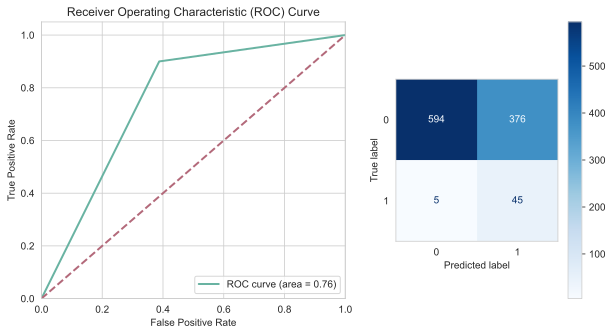

In [74]:
hf.plot_roc_and_confusion_matrix(
    pipe_reduced.named_steps["model"], pipe_reduced.named_steps["preprocessor"].transform(X_test_reduced), y_test
)

The ROC curve and confusion matrix are also exactly the same.

Finally, let's look at the SHAP values for this model with reduced features.

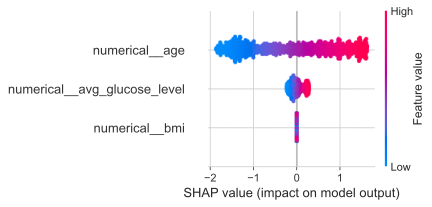

In [75]:
hf.plot_shap_values(
    pipe_reduced.named_steps["model"],
    pipe_reduced.named_steps["preprocessor"].transform(X_test),
    explainer="linear",
    feature_names=pipe_reduced.named_steps["preprocessor"].get_feature_names_out(),
    plot_size=(6,3)
)

Looking at the SHAP values, it seems like even BMI could be dropped since it does not impact the model very hard. I went back and tried this, but the metrics worsened a little bit when doing so.


Let's deploy this model

&nbsp;

&nbsp;

---

### <a id='toc1_5_5_'></a>[Model Deployment](#toc0_)

To deploy the model, I'll save it first, and then deploy it using FastAPI

In [76]:
filename = "models/deployment/deployment_model.pkl"
if not os.path.exists(filename):
    joblib.dump(pipe_reduced, filename)

To run the deployment server, use the following command in the terminal:

```uvicorn src.lib.deployment:app --reload```

Now we can run the following cell to get a prediction. 

`To prevent errors when running all code cells, the cell below is set to markdown. Convert it to a code cell with the shortcut Y and feel free to run it.`

age = 30
bmi = 33
avg_glucose_level = 150

response = requests.post(
    "http://127.0.0.1:8000/predict",
    json=[float(age), float(bmi), float(avg_glucose_level)],
)
if response.status_code == 200:
    logger.info(f"Is this patient at risk of suffering a stroke: {response.json()['prediction']}")

&nbsp;

&nbsp;

---

## Summary

The goal of the project was to be able to predict whether someone is at risk of suffering from a stroke with 80% certainty. Whether this goal was achieved depends on how we look at the results. There was 90% recall achieved, but only 10.7% precision. We're thus predicting too much that someone is at risk of a stroke, in favor of missing people that are at risk. In my opinion, the results need to improve to call the project a success. There`s just simply too many people that the model predicts to be at risk, while they are not.

That being said, there's no information on what each row in the dataset describes. What I mean is, that it's not stated whether every row is a death, and that the stroke column describes whether they died of a stroke. For instance, if someone died in a car crash, and the dataset thus contains a value of 0 for stroke, that person could still have been at risk of a stroke. Things like this are inherently difficult to create good datasets for.

However, I feel that better performance should be possible, but I'm not able to achieve it. When I think back about the EDA and the SHAP values from the first linear model, hypertension seemed an important factor, but it did not get a high ranking during recursive feature elimination. Maybe I'm missing some knowledge here. I'm looking eager to hear your opinion on this.

&nbsp;

&nbsp;

---

## Improvements

I definitely believe that there`s improvements that can be made. Here's some of the things that I believe could be improved:

- Instead of predicting stroke or no stroke, we could use probabilities and group the predictions into no-, low-, medium- and high risk of stroke.

- Using probabilities could also be used to set a different threshold of when to predict stroke. This might reduce the false positive ratio.